# Testing Awal

## Input image Botol AVENT

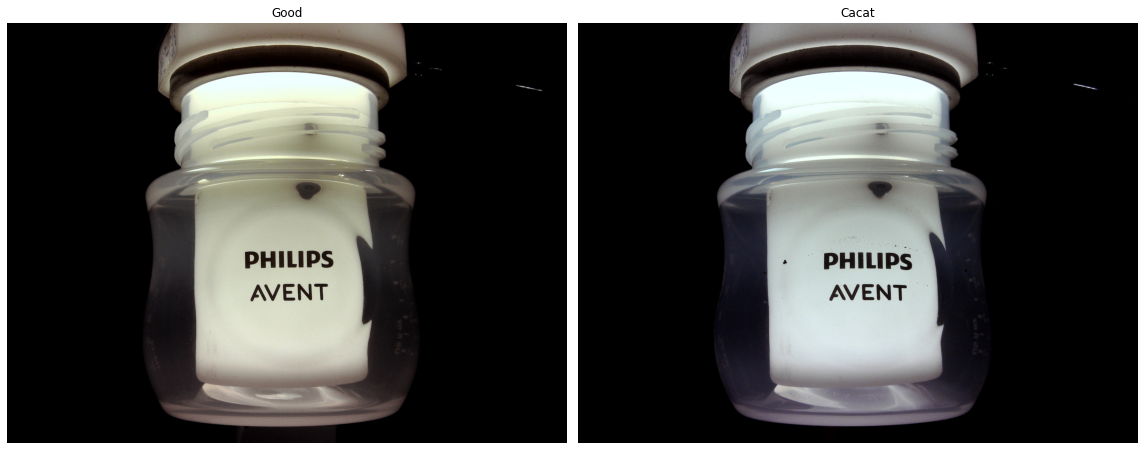

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

image1 = Image.open(r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\good\GOOD_AVENT20230728112550235490.jpg")
image2 = Image.open(r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\reject\REJECT_AVENT20230728114502193172.jpg")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title("Good")

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title("Cacat")

plt.tight_layout()
plt.show()

## Cropping Logo

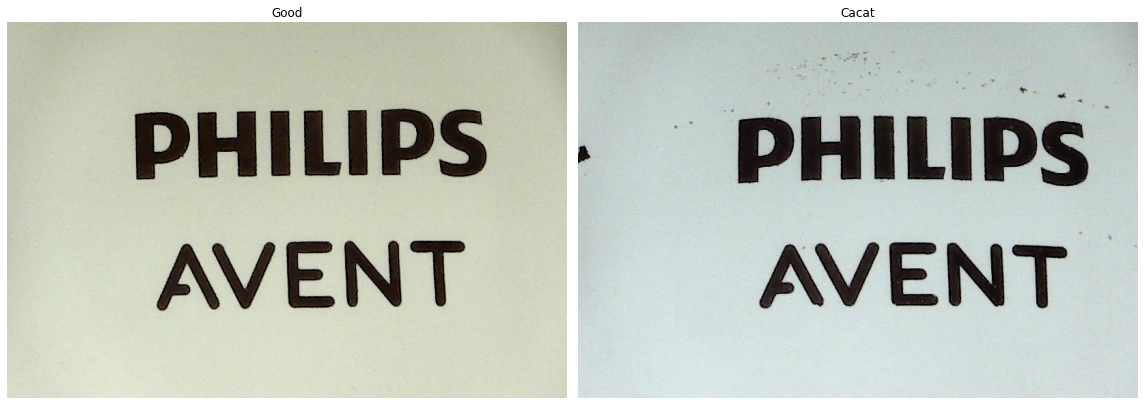

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

left1, upper1, right1, lower1 = 1200, 1200, 2020, 1750
cropped_image1 = image1.crop((left1, upper1, right1, lower1))

left2, upper2, right2, lower2 = 1200, 1200, 2020, 1750
cropped_image2 = image2.crop((left2, upper2, right2, lower2))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(cropped_image1)
axes[0].axis('off')
axes[0].set_title("Good")

axes[1].imshow(cropped_image2)
axes[1].axis('off')
axes[1].set_title("Cacat")

plt.tight_layout()
plt.show()

## Threshold Biner (0 dan 255)


### Brightness & Threshold (Filter >120)

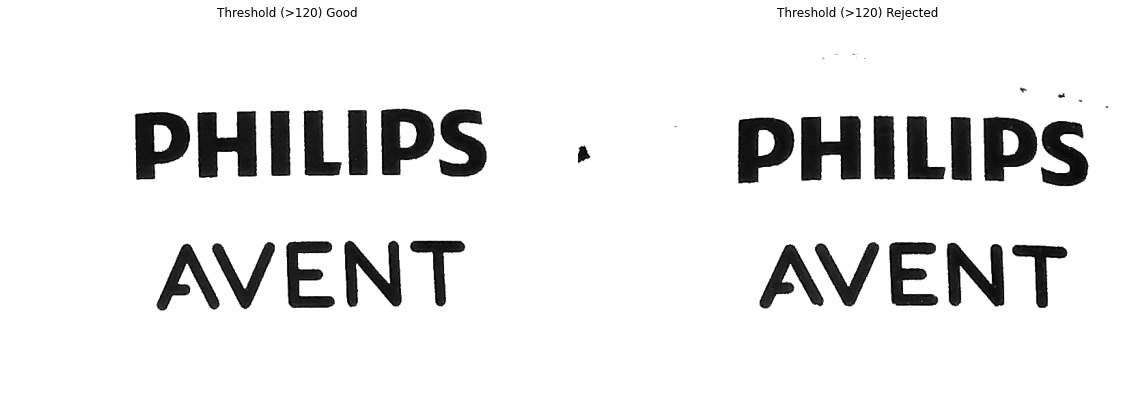

In [4]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Convert PIL Image to NumPy array
image1_th1 = cv2.cvtColor(np.array(cropped_image1), cv2.COLOR_RGB2GRAY)
image2_th2 = cv2.cvtColor(np.array(cropped_image2), cv2.COLOR_RGB2GRAY)

# Set pixel values above 200 to 0, while leaving values between 0 and 200 unchanged
threshold_value = 120
image1_th1[image1_th1 > threshold_value] = 255
image2_th2[image2_th2 > threshold_value] = 255

# Plot the modified images side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Modified image 1
axes[0].imshow(image1_th1, cmap='gray')  # Display in grayscale
axes[0].axis('off')
axes[0].set_title("Threshold (>120) Good")

# Modified image 2
axes[1].imshow(image2_th2, cmap='gray')  # Display in grayscale
axes[1].axis('off')
axes[1].set_title("Threshold (>120) Rejected")

plt.tight_layout()
plt.show()

## Uji Parameter Evaluasi

In [5]:
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as compare_ssim


cropped_image1_gray = np.array(image1_th1)
cropped_image2_gray = np.array(image2_th2)

def normalized_cross_correlation(image, template):
    mean_template = np.mean(template)
    mean_image = np.mean(image)

    image_minus_mean = image - mean_image
    template_minus_mean = template - mean_template
    
    numerator = np.sum(image_minus_mean * template_minus_mean)
    
    denom_image = np.sqrt(np.sum(image_minus_mean**2))
    denom_template = np.sqrt(np.sum(template_minus_mean**2))
    
    similarity_score = numerator / (denom_image * denom_template)

    return similarity_score

def dice_coefficient(image1, image2):
    intersection = np.sum(image1 & image2)
    dice = (2.0 * intersection) / (np.sum(image1) + np.sum(image2))
    return dice

def intersection_over_union(image1, image2):
    intersection = np.sum(image1 & image2)
    union = np.sum(image1 | image2)
    iou = float(intersection) / union
    return iou


ssim_score = compare_ssim(cropped_image1_gray, cropped_image2_gray)
similarity_score = normalized_cross_correlation(image1_th1, image2_th2)
dc_score = dice_coefficient(image1_th1, image2_th2)
iou_score = intersection_over_union(image1_th1, image2_th2)

print(f"SSIM Score: {ssim_score}")
print("Normalized Cross-Correlation Similarity Score:", similarity_score)
print("dc_score :", dc_score)
print("iou_score :", iou_score)

SSIM Score: 0.8251342952899338
Normalized Cross-Correlation Similarity Score: 0.44074337582564865
dc_score : 0.9463674502414497
iou_score : 0.8981949641346205


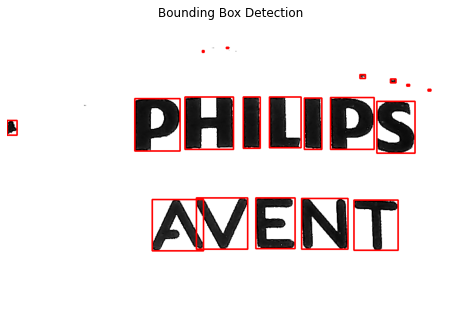

Jumlah objek terdeteksi : 19
Botol Rejected : Over Printing


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Setel semua piksel dengan nilai 255 menjadi hitam (0)
image2_convert = np.copy(image2_th2)
image2_convert[image2_convert == 255] = 0

# Temukan kontur objek dalam citra yang bukan hitam
contours, _ = cv2.findContours(image2_convert, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inisialisasi daftar untuk menyimpan koordinat 4 titik sudut
corner_coordinates = []

# Minimum contour area threshold
min_contour_area = 1  # You can adjust this threshold

# Loop melalui setiap kontur yang ditemukan
for contour in contours:
    # Dapatkan koordinat titik sudut objek (4 titik ujung)
    x, y, w, h = cv2.boundingRect(contour)
    x2, y2 = x + w, y + h

    # Hitung luas kontur
    contour_area = cv2.contourArea(contour)

    # Hanya tambahkan kontur ke daftar jika luasnya lebih besar dari ambang batas
    if contour_area >= min_contour_area:
        corner_coordinates.append(((x, y), (x2, y2)))

# Pastikan setidaknya ada satu objek yang ditemukan
if corner_coordinates:
    
    # Gambarkan kotak berdasarkan koordinat titik sudut pada citra asli
    image_with_boxes = cv2.cvtColor(image2_th2, cv2.COLOR_GRAY2BGR)
    for i, ((x, y), (x2, y2)) in enumerate(corner_coordinates, start=1):
        # Generate a random color for each bounding box
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(image_with_boxes, (x, y), (x2, y2), (0,0,255), 2)

    # Tampilkan citra dengan kotak di sekitar objek
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Bounding Box Detection')
    plt.axis('off')
    plt.show()

else:
    print("No objects were found in the image.")


jumlah_objek = len(corner_coordinates)
print("Jumlah objek terdeteksi :", jumlah_objek)

if jumlah_objek > 12 :
    print("Botol Rejected : Over Printing")
else :
    print("Botol Good")